In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

•	CLIENT_ID - идентификатор клиента;

•	VALUE_DAY - отчетная дата;

•	DIGITAL_30_CNT - кол-во входов в мобильное приложение за последние 30 дней на отчетную дату;

•	TRAN_ACTIVE_30_CNT - кол-во транзакций в мобильном приложении за последние 30 дней на отчетную дату;

•	OPER_ACTIVE_30_CNT - кол-во операций (транзакции+нефинансовые операции) в мобильном приложении за последние 30 дней на отчетную дату


In [ ]:
data = pd.read_csv('/content/data_test.csv', delimiter=';')

In [ ]:
data.head()

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0


In [ ]:
data.shape

(805821, 5)

Пропуски есть, но нет необходимости с ними работать, тк возможно человек не посещал конкретный лендинг (страничку)

In [ ]:
data.isna().sum() # пропуски по столбцам

,0
CLIENT_ID,0
VALUE_DAY,0
DIGITAL_30_CNT,94652
TRAN_ACTIVE_30_CNT,94652
OPER_ACTIVE_30_CNT,94652


правда странно, что пропусков по столбцам одинаковое кол-во

In [ ]:
data.isna()

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
805816,False,False,False,False,False
805817,False,False,False,False,False
805818,False,False,True,True,True
805819,False,False,False,False,False


In [ ]:
data.iloc[805818]

,805818
CLIENT_ID,302417315
VALUE_DAY,28.02.2022
DIGITAL_30_CNT,NaN
TRAN_ACTIVE_30_CNT,NaN
OPER_ACTIVE_30_CNT,NaN


In [ ]:
data[data['CLIENT_ID'] == 302417315]

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
35498,302417315,30.09.2021,NaN,NaN,NaN
224197,302417315,31.10.2021,NaN,NaN,NaN
392269,302417315,30.11.2021,NaN,NaN,NaN
512404,302417315,31.12.2021,NaN,NaN,NaN
546761,302417315,31.01.2022,NaN,NaN,NaN
805818,302417315,28.02.2022,NaN,NaN,NaN


поняла, что это связано с тем, что человек в целом не заходил в приложение

но пользуется продуктами банка

# задание

●	Построй визуальное представление удержания клиентов в статусе:

○	 активных клиентов банка (наличие строки для клиента на отчетную дату);

○	диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);

○	операционно активных;

○	транзакционно активных;


In [ ]:
len(data['CLIENT_ID'].unique()) # кол-во уникальных клиентов (id)

169092

рассчет данных для активных клиентов банка

In [ ]:
min(data['VALUE_DAY']), max(data['VALUE_DAY']) # строковый тип

('28.02.2022', '31.12.2021')

In [ ]:
data['VALUE_DAY'] = pd.to_datetime(data['VALUE_DAY'], format='%d.%m.%Y')

In [ ]:
min(data['VALUE_DAY']), max(data['VALUE_DAY']) # тип дата

(Timestamp('2021-09-30 00:00:00'), Timestamp('2022-02-28 00:00:00'))

# данные за 09-2021 по 02-2022 (6 месяцев)

In [ ]:
# столбец с когортным индексом для отслеживания времени удержания
data['ACCOUNT_START_DATE'] = data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')
#data['Cohort_Index'] = (data['VALUE_DAY'].dt.year - data['ACCOUNT_START_DATE'].dt.year) * 12 + (data['VALUE_DAY'].dt.month - data['ACCOUNT_START_DATE'].dt.month)

In [ ]:
data['VALUE_DAY'].iloc[0].month

9

In [ ]:
def index(date):
  dic = {9:0, 10:1, 11:2, 12:3, 1:4, 2:5}
  return dic[date.month]

In [ ]:
data['Cohort_Index'] = data['VALUE_DAY'].apply(index)

In [ ]:
data['START'] = data['ACCOUNT_START_DATE'].dt.to_period('M')

In [ ]:
# Подсчет уникальных клиентов по месяцам и когортам
cohort_data = data.groupby(['START','Cohort_Index'])['CLIENT_ID'].nunique().reset_index()

In [ ]:
cohort_pivot = cohort_data.pivot(index='START', columns='Cohort_Index', values='CLIENT_ID')

In [ ]:
cohort_pivot

Cohort_Index,0,1,2,3,4,5
START,,,,,,
2021-09,129232.0,124593.0,120232.0,116456.0,105547.0,104163.0
2021-10,NaN,7044.0,6936.0,6883.0,5040.0,4800.0
2021-11,NaN,NaN,5841.0,5743.0,5225.0,4377.0
2021-12,NaN,NaN,NaN,6875.0,6188.0,6170.0
2022-01,NaN,NaN,NaN,NaN,14770.0,14374.0
2022-02,NaN,NaN,NaN,NaN,NaN,5330.0


## CLIENT_ID это то, сколько уникальных активных юзеров есть в этом месяце

In [ ]:
cohort_data # данные по когортам

,START,Cohort_Index,CLIENT_ID
0,2021-09,0,129232
1,2021-09,1,124593
2,2021-09,2,120232
3,2021-09,3,116456
4,2021-09,4,105547
5,2021-09,5,104163
6,2021-10,1,7044
7,2021-10,2,6936
8,2021-10,3,6883
9,2021-10,4,5040


In [ ]:
cohort_pivot # сводная таблица

Cohort_Index,0,1,2,3,4,5
START,,,,,,
2021-09,129232.0,124593.0,120232.0,116456.0,105547.0,104163.0
2021-10,NaN,7044.0,6936.0,6883.0,5040.0,4800.0
2021-11,NaN,NaN,5841.0,5743.0,5225.0,4377.0
2021-12,NaN,NaN,NaN,6875.0,6188.0,6170.0
2022-01,NaN,NaN,NaN,NaN,14770.0,14374.0
2022-02,NaN,NaN,NaN,NaN,NaN,5330.0


https://www.kaggle.com/code/carrollstreet/churn-analysis

In [ ]:
# cohort_data['start_month'] = cohort_data['start_date'].astype('datetime64[M]')
# cohort_data['activity_month'] = cohort_data['activity_date'].astype('datetime64[M]')

# cohort_agg = (cohort_data.groupby(['start_month','activity_month'], as_index=False)
#               .agg({'employee_id':'count'})
#               .rename(columns={'employee_id':'retained_cnt'}))

# def cumdiff(x): return reduce(lambda a,b : abs(a-b),x)

# cohort_agg['retained_cnt'] = (cohort_agg.groupby('start_month')['retained_cnt'].expanding()
#                               .apply(cumdiff)
#                               .astype(int)
#                               .reset_index(drop=True))

# cohort_pivot = (cohort_agg.pivot_table(index='start_month',
#                                        columns='activity_month',
#                                        values='retained_cnt',
#                                        aggfunc='sum')
#                 .fillna(method='ffill',axis=1))

# cohort_pivot.index = cohort_pivot.index.strftime('%Y-%m')
# cohort_pivot.columns = cohort_pivot.columns.strftime('%Y-%m')

# Когортная матрица оттока активных клиентов по месяцам

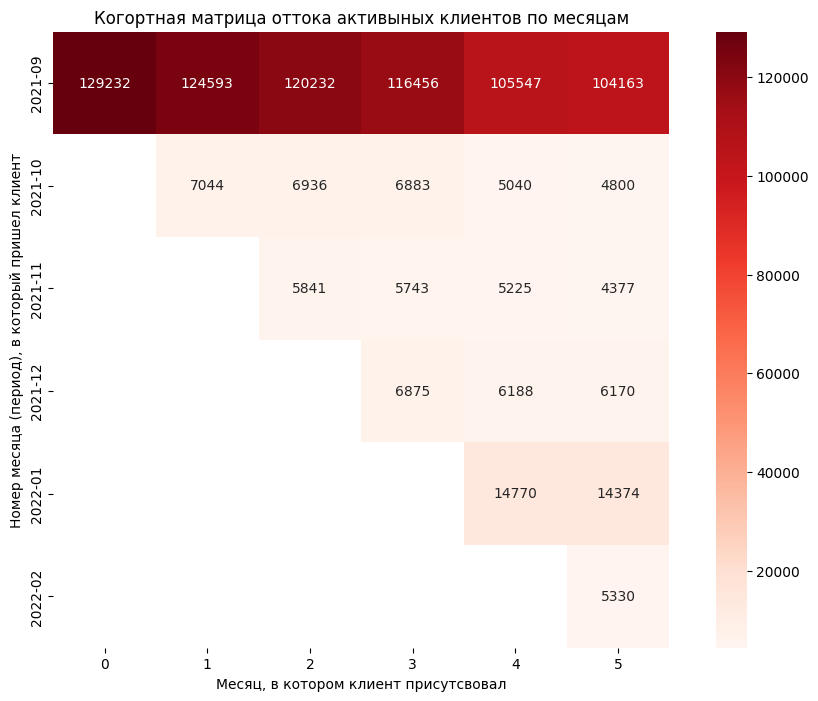

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cbar=True, ax=ax, square=True, cmap='Reds')
ax.set_title('Когортная матрица оттока активыных клиентов по месяцам')
ax.set_xlabel('Месяц, в котором клиент присутсвовал')
ax.set_ylabel('Номер месяца (период), в который пришел клиент')
plt.show()

## ○ диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);



•	DIGITAL_30_CNT - кол-во входов в мобильное приложение за последние 30 дней на отчетную дату;


In [ ]:
digital = data[data['DIGITAL_30_CNT'] > 0]
# Подсчет уникальных клиентов по месяцам и когортам для активных клиентов
cohort_digital = digital.groupby(['START', 'Cohort_Index'])['CLIENT_ID'].nunique().reset_index()

In [ ]:
digital

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,COHORT,ACCOUNT_START_DATE,Cohort_Index,START
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09,2021-09-30,0,2021-09
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09,2021-09-30,0,2021-09
2,4271531990,2021-09-30,2.0,0.0,0.0,2021-09,2021-09-30,0,2021-09
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09,2021-09-30,0,2021-09
4,1926920317,2021-09-30,3.0,0.0,0.0,2021-09,2021-09-30,0,2021-09
...,...,...,...,...,...,...,...,...,...
805815,4253033414,2022-02-28,2.0,0.0,0.0,2022-02,2021-09-30,5,2021-09
805816,4243322997,2022-02-28,2.0,0.0,0.0,2022-02,2021-09-30,5,2021-09
805817,67461867,2022-02-28,3.0,0.0,0.0,2022-02,2021-09-30,5,2021-09
805819,1780553365,2022-02-28,4.0,0.0,2.0,2022-02,2022-01-31,5,2022-01


In [ ]:
cohort_digital_pivot = cohort_digital.pivot(index='START', columns='Cohort_Index', values='CLIENT_ID')

In [ ]:
cohort_digital_pivot

Cohort_Index,0,1,2,3,4,5
START,,,,,,
2021-09,112885.0,108593.0,105986.0,103744.0,93562.0,93198.0
2021-10,NaN,6405.0,5522.0,5271.0,4227.0,4155.0
2021-11,NaN,NaN,5355.0,4655.0,4028.0,3699.0
2021-12,NaN,NaN,NaN,6306.0,5009.0,4906.0
2022-01,NaN,NaN,NaN,NaN,13440.0,12839.0
2022-02,NaN,NaN,NaN,NaN,NaN,4892.0


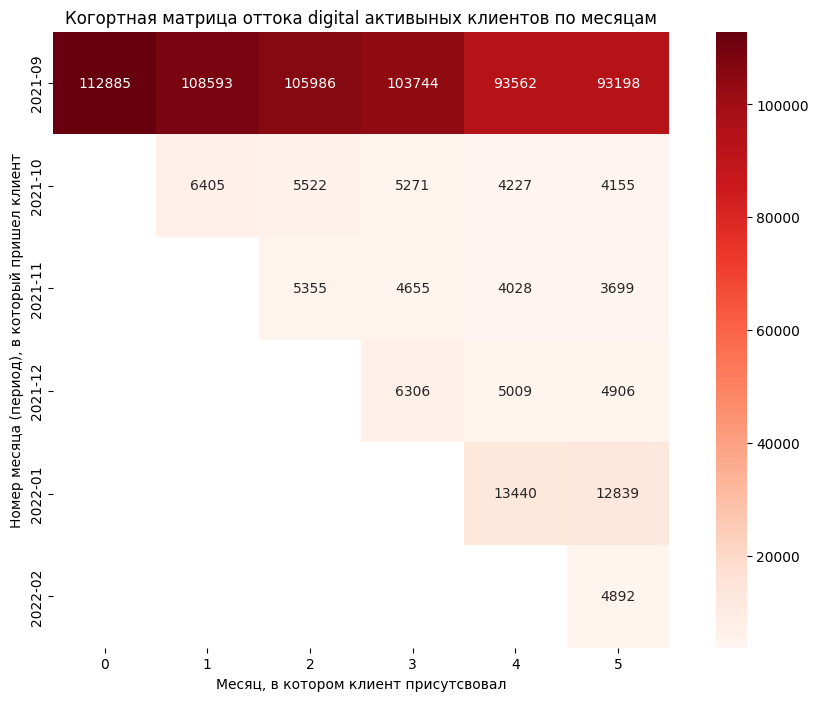

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_digital_pivot, annot=True, fmt='g', cbar=True, ax=ax, square=True, cmap='Reds')
ax.set_title('Когортная матрица оттока digital активыных клиентов по месяцам')
ax.set_xlabel('Месяц, в котором клиент присутсвовал')
ax.set_ylabel('Номер месяца (период), в который пришел клиент')
plt.show()

## ○ транзакционно активных;


•	TRAN_ACTIVE_30_CNT - кол-во транзакций в мобильном приложении за последние 30 дней на отчетную дату;

In [ ]:
tran = data[data['TRAN_ACTIVE_30_CNT'] > 0]

In [ ]:
# Подсчет уникальных клиентов по месяцам и когортам для активных клиентов
cohort_tran = tran.groupby(['START', 'Cohort_Index'])['CLIENT_ID'].nunique().reset_index()

In [ ]:
cohort_tran_pivot = cohort_tran.pivot(index='START', columns='Cohort_Index', values='CLIENT_ID')

In [ ]:
cohort_tran_pivot

Cohort_Index,0,1,2,3,4,5
START,,,,,,
2021-09,78372.0,77215.0,76702.0,76566.0,68111.0,69989.0
2021-10,NaN,4196.0,3469.0,3436.0,2923.0,2929.0
2021-11,NaN,NaN,3463.0,2905.0,2568.0,2534.0
2021-12,NaN,NaN,NaN,4226.0,3129.0,3231.0
2022-01,NaN,NaN,NaN,NaN,9826.0,9575.0
2022-02,NaN,NaN,NaN,NaN,NaN,3384.0


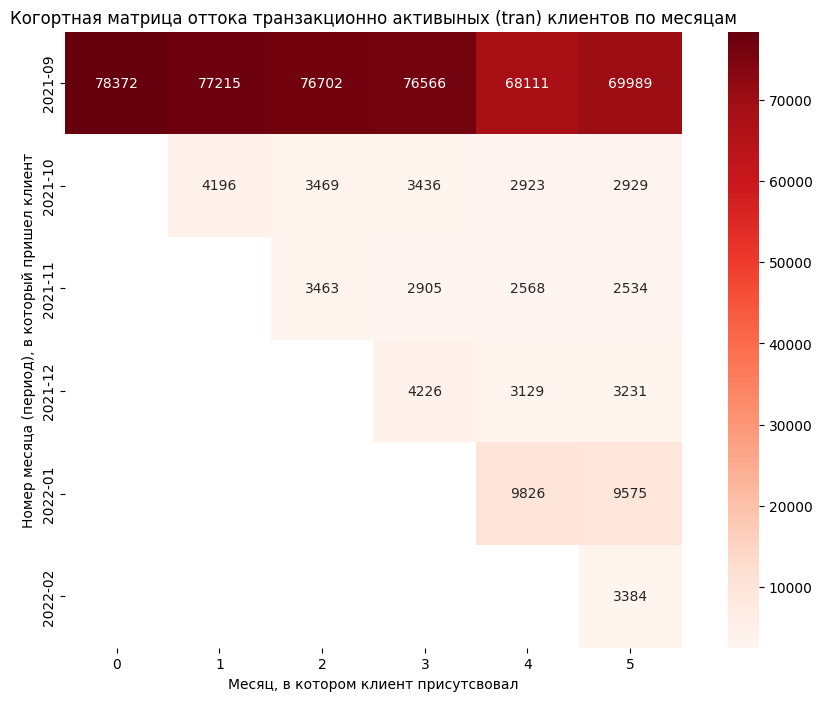

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_tran_pivot, annot=True, fmt='g', cbar=True, ax=ax, square=True, cmap='Reds')
ax.set_title('Когортная матрица оттока транзакционно активыных (tran) клиентов по месяцам')
ax.set_xlabel('Месяц, в котором клиент присутсвовал')
ax.set_ylabel('Номер месяца (период), в который пришел клиент')
plt.show()


## ○ операционно активных;

•	OPER_ACTIVE_30_CNT - кол-во операций (транзакции+нефинансовые операции) в мобильном приложении за последние 30 дней на отчетную дату

In [ ]:
# Подсчет уникальных клиентов по месяцам и когортам для активных клиентов
cohort_oper = oper.groupby(['START', 'Cohort_Index'])['CLIENT_ID'].nunique().reset_index()

In [ ]:
cohort_oper_pivot = cohort_oper.pivot(index='START', columns='Cohort_Index', values='CLIENT_ID')

In [ ]:
cohort_oper_pivot

Cohort_Index,0,1,2,3,4,5
START,,,,,,
2021-09,85414.0,83146.0,83359.0,85079.0,74705.0,75856.0
2021-10,NaN,4962.0,3971.0,4001.0,3234.0,3244.0
2021-11,NaN,NaN,4286.0,3456.0,2956.0,2879.0
2021-12,NaN,NaN,NaN,5233.0,3715.0,3714.0
2022-01,NaN,NaN,NaN,NaN,11138.0,10570.0
2022-02,NaN,NaN,NaN,NaN,NaN,4026.0


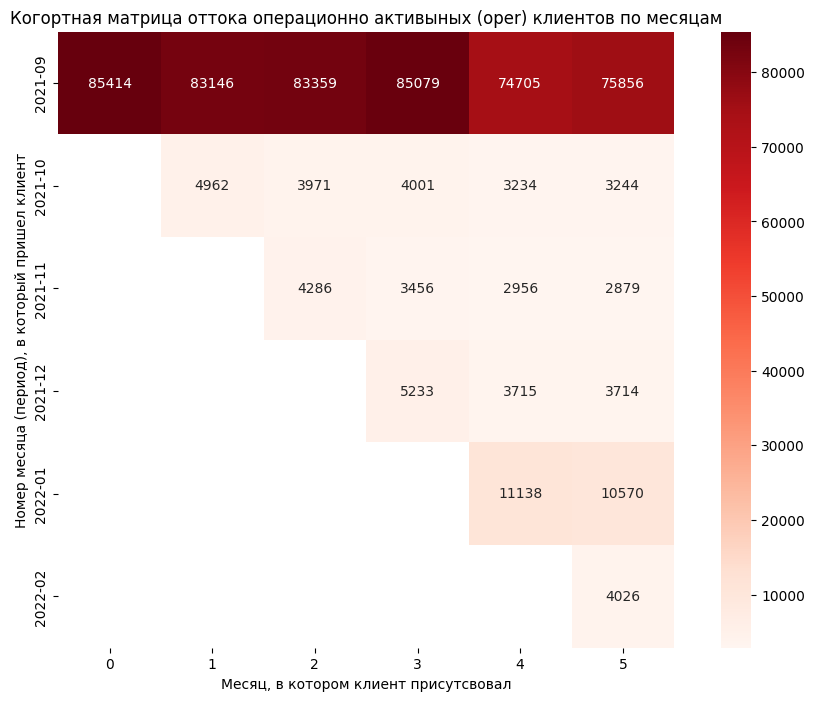

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_oper_pivot, annot=True, fmt='g', cbar=True, ax=ax, square=True, cmap='Reds')
ax.set_title('Когортная матрица оттока операционно активыных (oper) клиентов по месяцам')
ax.set_xlabel('Месяц, в котором клиент присутсвовал')
ax.set_ylabel('Номер месяца (период), в который пришел клиент')
plt.show()

# Это была проверка на клиентов, которые возможно были активны, потом не активны, потом активны снова, но таких не оказалось (по общей 1 критерию активности)

In [ ]:
# Сортируем данные по клиентам и дате
data = data.sort_values(by=['CLIENT_ID', 'VALUE_DAY'])

# Группируем по клиентам и извлекаем список дат
grouped_data = data.groupby('CLIENT_ID')['VALUE_DAY'].apply(lambda x: list(x)).reset_index()

# Определяем клиентов, которые ушли и вернулись
def identify_returning_clients(value_days):
    # Если у клиента менее 2 записей, он не мог вернуться
    if len(value_days) < 2:
        return False

    value_days = pd.Series(value_days)
    months = pd.date_range(start=value_days.min(), end=value_days.max(), freq='MS')

    # Выявляем, какие месяцы пропущены
    missing_months = ~months.isin(value_days)

    # Если пропусков нет, клиент никогда не уходил
    if not missing_months.any():
        return False

    # Определяем индекс последнего активного месяца
    last_active_index = months[~missing_months].index[-1] if (~missing_months).any() else None
    if last_active_index is None:
        return False

    last_attended = months[last_active_index]

    # Проверяем, есть ли записи после последнего активного месяца
    subsequent_months = months[last_active_index + 1:] if last_active_index + 1 < len(months) else []

    # Если в последующих месяцах есть записи, значит, клиент вернулся
    for month in subsequent_months:
        if month in value_days.values:
            return True

    return False

# Применяем функцию к каждому клиенту
grouped_data['RETURNED'] = grouped_data['VALUE_DAY'].apply(identify_returning_clients)

# Отфильтруем клиентов, которые вернулись
returning_clients = grouped_data[grouped_data['RETURNED']]

# Выводим информацию о клиентах, которые сначала были активны, ушли и вернулись
print(returning_clients[['CLIENT_ID']])

Empty DataFrame
Columns: [CLIENT_ID]
Index: []


# Какие выводы можно сделать на основе этих данных?



В каждой из категорий можно заметить, что с каждым месяцем приходит все меньше новых клиентов.
В сентябре замечено очень большое кол-во клиентов, однако остальные месяцы отражают очень низкие показатели.
В январе есть небольшое повышение, возможно связанное с активностью в виде переводов или прочим после новогодних праздников.

Также количество клиентов, осуществляющих нефинансовые операции, крайне мало. Все категории активностей показывают схожую тенденцию к уменьшению, что указывает на возможность общего падения интереса к услугам банка или недостаточной вовлеченности клиентов.

●	Если построить проникновение транзакционно активных клиентов в когорты диджитал-активных клиентов, то мы увидим, что существенная часть клиентов использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем. Какие гипотезы такого поведения можно предположить? Как их можно проверить?


# Транзакционные + диджитал активные клиенты проникновение

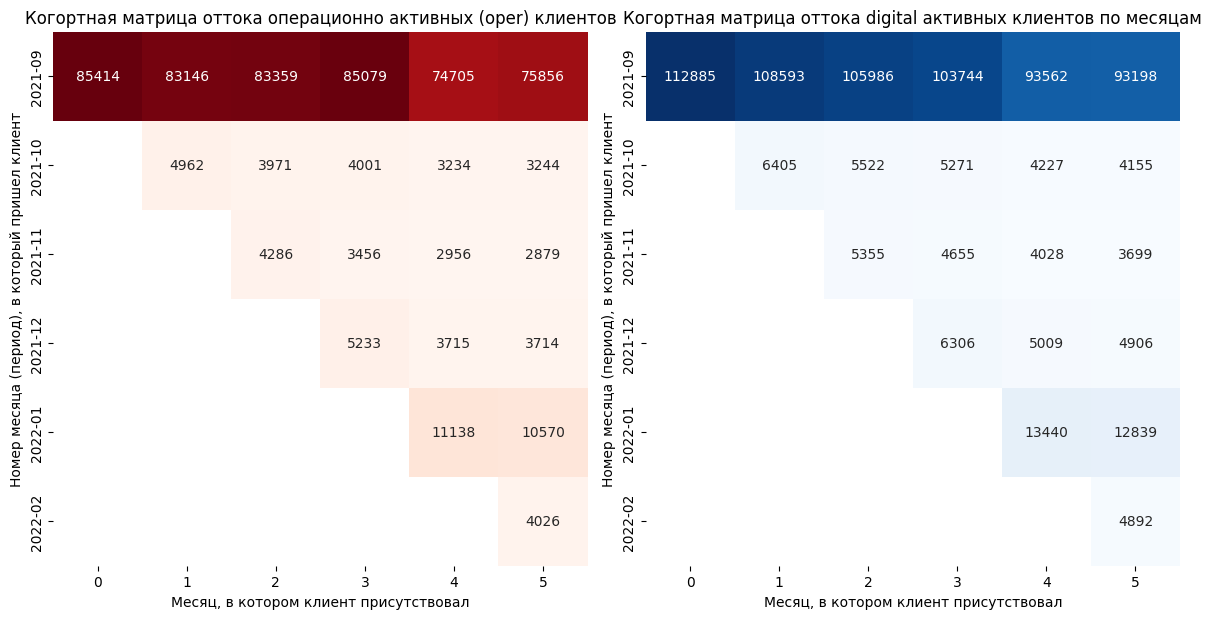

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Когортная матрица для операционно активных клиентов
sns.heatmap(cohort_oper_pivot, annot=True, fmt='g', cbar=False, ax=ax1, square=True, cmap='Reds')
ax1.set_title('Когортная матрица оттока операционно активных (oper) клиентов')
ax1.set_xlabel('Месяц, в котором клиент присутствовал')
ax1.set_ylabel('Номер месяца (период), в который пришел клиент')

# Когортная матрица для digital активных клиентов
sns.heatmap(cohort_digital_pivot, annot=True, fmt='g', cbar=False, ax=ax2, square=True, cmap='Blues')
ax2.set_title('Когортная матрица оттока digital активных клиентов по месяцам')
ax2.set_xlabel('Месяц, в котором клиент присутствовал')
ax2.set_ylabel('Номер месяца (период), в который пришел клиент')

plt.tight_layout()  # Делает так, чтобы подграфики не налезали друг на друга
plt.show()

# Гипотезы и способы проверки

1. Клиенты могут использовать мобильное приложение для получения информации, но нет необходимости/возможности совершать транзакции. Отсутствие нужных функций (удобного интерфейса для переводов и др) может мешать им делать транзакции.

Проверка: (Опросы и интервью) Проведение опросов среди пользователей приложения (какие функции они хотели бы видеть и почему не совершают транзакции)


2. Клиенты могут избегать совершения транзакций через мобильное приложение из-за опасений допустить ошибки/потерять деньги. Это может быть актуально для пожилой категории пользователей.

Проверка: (Анализ поведения пользователей) Использовать аналитические инструменты для отслеживания пользовательского поведения в приложении, чтобы понять, на каких этапах пользователи отказываются от завершения транзакции (например, конверсию просмотра к клику)


3. Пользователи могут не быть осведомлены о том, как использовать приложение для совершения транзакций или о преимуществах, связанных с использованием приложения для платежей и переводов.

Проверка: (Тестирование) AB-тестирования новых функций приложения для оценки влияния на транзакционную активность




#	Как можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал-активных?

1. Улучшение пользовательского опыта Обновление интерфейса приложения для упрощения процесса совершения транзакций и добавление подсказок по приложению (в формате видео и др)


2. Маркетинг Проведение кампаний для информирования клиентов о доступных функциях приложения и преимуществах использования мобильного банка для совершения транзакций

3. Бонусные программы Предложение клиентам бонусов или повышенного кэшбэка за использование приложения для совершения транзакций

4. Обратная связь Регулярное получение обратной связи от пользователей для выявления проблем и возможностей улучшения

5. Обучение Помощь с использованием приложения, проведения обучения клиентов использованию приложения (пожилая категория преимущественно)